In [25]:
cd /content/drive/MyDrive/Git/ICT_Visual/Code

/content/drive/MyDrive/Git/ICT_Visual/Code


In [26]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt

from tensorflow.keras.models import Sequential, Model
from tensorflow.keras.layers import Flatten, Dense, Input
from tensorflow.keras.optimizers import SGD, Adam

In [27]:
try :
    loaded_data = np.loadtxt('../Data/diabetes.csv',delimiter=',')
    
    x_data = loaded_data[:, 0:-1]
    t_data = loaded_data[:, [-1]]

    print(f'x_data.shape = {x_data.shape}')
    print(f't_data.shape = {t_data.shape}')

except Exception as err:

    print(str(err))

x_data.shape = (759, 8)
t_data.shape = (759, 1)


In [41]:
from tensorflow.keras.utils import to_categorical

t_data_one_hot = to_categorical(t_data)

print(t_data.shape, t_data_one_hot.shape)

(759, 1) (759, 2)


In [29]:
print(x_data[:2])
print(t_data_one_hot[:2])

s = np.arange(len(x_data)) # index 생성

# print(s)

np.random.shuffle(s)

# print(s)

x_data = x_data[s]
t_data_one_hot = t_data_one_hot[s]

print(x_data[:2])
print(t_data_one_hot[:2])

[[-0.294118    0.487437    0.180328   -0.292929    0.          0.00149028
  -0.53117    -0.0333333 ]
 [-0.882353   -0.145729    0.0819672  -0.414141    0.         -0.207153
  -0.766866   -0.666667  ]]
[[1. 0.]
 [0. 1.]]
[[ 0.411765   0.407035   0.393443  -0.333333   0.         0.114754
  -0.858241  -0.333333 ]
 [ 0.         0.0954774  0.442623  -0.393939   0.        -0.0312965
  -0.336465  -0.433333 ]]
[[0. 1.]
 [1. 0.]]


In [30]:
TEST_SPLIT_RATIO = 0.1

test_nums = int(TEST_SPLIT_RATIO*len(x_data))

print('test_nums = ', test_nums)

x_test = x_data[:test_nums]
t_test = t_data_one_hot[:test_nums]

x_data = x_data[test_nums:]
t_data_one_hot = t_data_one_hot[test_nums:]

print(x_data.shape, t_data_one_hot.shape)
print(x_test.shape, t_test.shape)


test_nums =  75
(684, 8) (684, 2)
(75, 8) (75, 2)


In [31]:
VAL_SPLIT_RATIO = 0.1

val_nums = int(VAL_SPLIT_RATIO*len(x_data))

print('val_nums = ', val_nums)

x_val = x_data[:val_nums]
t_val = t_data_one_hot[:val_nums]

x_data = x_data[val_nums:]
t_data_one_hot = t_data_one_hot[val_nums:]

print(x_data.shape, t_data_one_hot.shape)
print(x_val.shape, t_val.shape)


val_nums =  68
(616, 8) (616, 2)
(68, 8) (68, 2)


In [32]:
x_data.shape[1]

8

In [33]:
input_ = Input(shape=(x_data.shape[1],))

output_ = Dense(2, activation='softmax')(input_)

model = Model(inputs=input_, outputs=output_)

In [34]:
model.compile(optimizer=SGD(learning_rate=0.01), loss='categorical_crossentropy', metrics=['accuracy'])
model.summary()

Model: "model_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_4 (InputLayer)        [(None, 8)]               0         
                                                                 
 dense_4 (Dense)             (None, 2)                 18        
                                                                 
Total params: 18
Trainable params: 18
Non-trainable params: 0
_________________________________________________________________


In [35]:
x_data.shape, t_data_one_hot.shape

((616, 8), (616, 2))

In [36]:
hist = model.fit(x_data, t_data_one_hot, epochs=500, validation_data=(x_val, t_val), verbose=2)

Epoch 1/500
20/20 - 1s - loss: 0.8602 - accuracy: 0.3912 - val_loss: 0.8943 - val_accuracy: 0.3529 - 548ms/epoch - 27ms/step
Epoch 2/500
20/20 - 0s - loss: 0.7828 - accuracy: 0.4253 - val_loss: 0.8089 - val_accuracy: 0.3382 - 50ms/epoch - 3ms/step
Epoch 3/500
20/20 - 0s - loss: 0.7288 - accuracy: 0.4821 - val_loss: 0.7471 - val_accuracy: 0.4853 - 67ms/epoch - 3ms/step
Epoch 4/500
20/20 - 0s - loss: 0.6917 - accuracy: 0.5357 - val_loss: 0.7060 - val_accuracy: 0.5588 - 69ms/epoch - 3ms/step
Epoch 5/500
20/20 - 0s - loss: 0.6685 - accuracy: 0.5942 - val_loss: 0.6756 - val_accuracy: 0.6324 - 69ms/epoch - 3ms/step
Epoch 6/500
20/20 - 0s - loss: 0.6520 - accuracy: 0.6282 - val_loss: 0.6533 - val_accuracy: 0.6765 - 69ms/epoch - 3ms/step
Epoch 7/500
20/20 - 0s - loss: 0.6406 - accuracy: 0.6477 - val_loss: 0.6367 - val_accuracy: 0.6324 - 50ms/epoch - 3ms/step
Epoch 8/500
20/20 - 0s - loss: 0.6324 - accuracy: 0.6510 - val_loss: 0.6228 - val_accuracy: 0.6324 - 70ms/epoch - 3ms/step
Epoch 9/500
20

In [37]:
model.evaluate(x_test, t_test)

3/3 [==============================] - 0s 5ms/step - loss: 0.4230 - accuracy: 0.8000


[0.4230245053768158, 0.800000011920929]

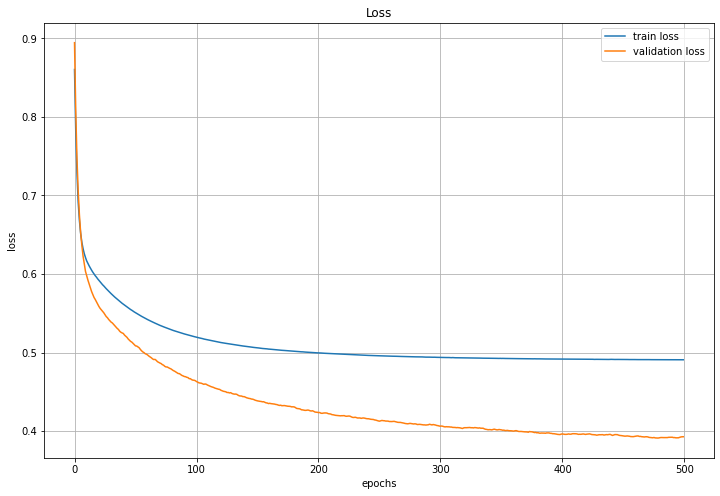

In [38]:
plt.figure(figsize=(12,8))
plt.title('Loss')
plt.xlabel('epochs')
plt.ylabel('loss')
plt.grid()

plt.plot(hist.history['loss'], label='train loss')
plt.plot(hist.history['val_loss'], label='validation loss')

plt.legend(loc='best')

plt.show()

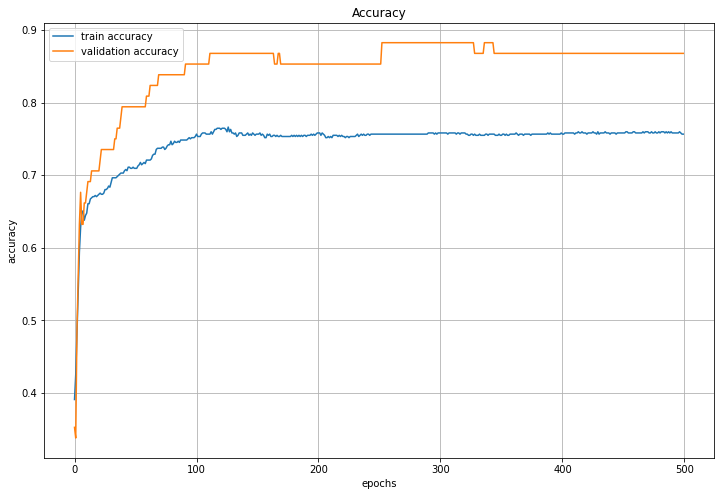

In [39]:
plt.figure(figsize=(12,8))
plt.title('Accuracy')
plt.xlabel('epochs')
plt.ylabel('accuracy')
plt.grid()

plt.plot(hist.history['accuracy'], label='train accuracy')
plt.plot(hist.history['val_accuracy'], label='validation accuracy')

plt.legend(loc='best')

plt.show()